In [4]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv(r"D:\Excel R\Data Science Assignments\Linear Regression\delivery_time.csv")

In [6]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
data.shape

(21, 2)

In [8]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [10]:
data.mean()

Delivery Time    16.790952
Sorting Time      6.190476
dtype: float64

In [11]:
data.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

In [12]:
data.median()

Delivery Time    17.83
Sorting Time      6.00
dtype: float64

In [13]:
data.std()

Delivery Time    5.074901
Sorting Time     2.542028
dtype: float64

In [14]:
data.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [15]:
data.kurtosis()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [17]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [19]:
## There  is do null values in the data set 
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [ ]:
##Rename the coumns

In [21]:
data=data.rename(columns={'Delivery Time': 'DT',
                          'Sorting Time': 'ST'})

In [23]:
data.head(5)

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:>

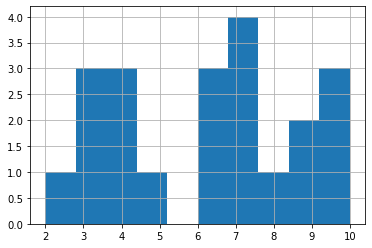

In [24]:
data['ST'].hist()

<AxesSubplot:>

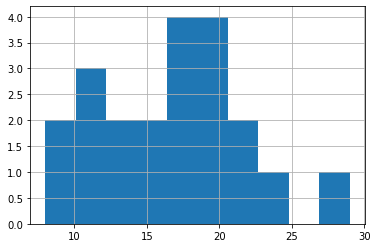

In [20]:
data['DT'].hist()

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

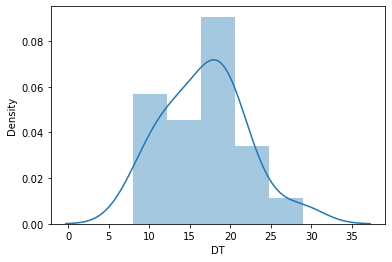

In [25]:
sns.distplot(data['DT'])

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

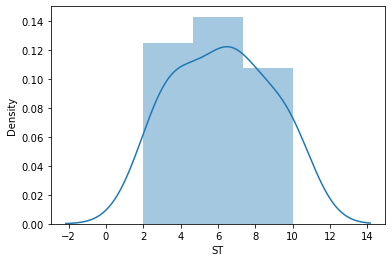

In [26]:
sns.distplot(data['ST'])

<AxesSubplot:>

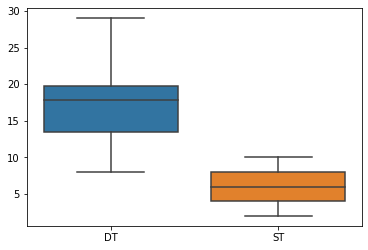

In [30]:
sns.boxplot(data=data)

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DT'>

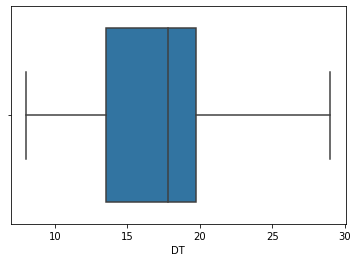

In [31]:
sns.boxplot(data.DT)

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ST'>

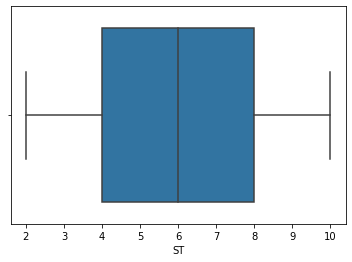

In [32]:
sns.boxplot(data.ST)

In [33]:
#  Checking the corelation between DT and ST r value is ==> 0.82 this is Moderately correlated
data.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


<AxesSubplot:xlabel='ST', ylabel='DT'>

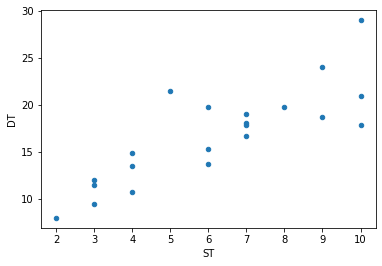

In [35]:
data.plot.scatter(x="ST",y="DT")

<AxesSubplot:xlabel='DT', ylabel='ST'>

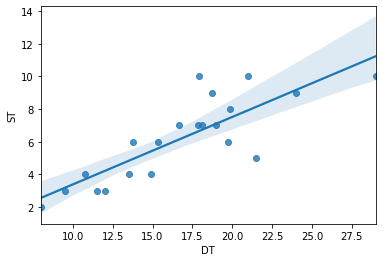

In [79]:
sns.regplot(y='ST',x='DT',data=data)

In [80]:
x=data.ST
y=data.DT

In [100]:
import statsmodels.formula.api as smf
model =smf.ols("data.iloc[:,0]~data.iloc[:, -1]",data=data).fit()

In [101]:
model.params

Intercept           6.582734
data.iloc[:, -1]    1.649020
dtype: float64

In [102]:
print(model.pvalues)

Intercept           0.001147
data.iloc[:, -1]    0.000004
dtype: float64


In [103]:
model.tvalues

Intercept           3.823349
data.iloc[:, -1]    6.387447
dtype: float64

In [104]:
model.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x00000255828B63D0>>

In [105]:
df=data.iloc[:,1]

In [106]:
ST1=pd.DataFrame(df,columns=['ST'])

In [107]:
ST1

,ST
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [109]:
data_pred=model.predict(ST1)

In [110]:
data_pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [117]:
#Errors
errors = data.ST-data_pred
errors

0    -13.072933
1     -9.178814
2    -10.476853
3    -12.423913
4    -13.072933
5    -10.476853
6    -11.125873
7     -8.529794
8    -13.072933
9    -12.423913
10   -11.774893
11    -9.178814
12   -11.125873
13    -8.529794
14    -8.529794
15    -9.178814
16   -10.476853
17   -11.125873
18    -7.880774
19   -11.125873
20    -9.827833
dtype: float64

In [119]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [166]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [121]:
mse=mean_squared_error(y,data_pred)
mse

7.793311548584063

In [122]:
rmse =sqrt(mse)
rmse

2.7916503270617654

# Transformations

In [123]:
#Log Transformations
log1=np.log(data['DT'])
log2=np.log(data['ST'])
log3=pd.DataFrame(data=(log1,log2))

In [124]:
log3=log3.transpose()

In [128]:
log3

,DT,ST
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


<AxesSubplot:xlabel='ST', ylabel='DT'>

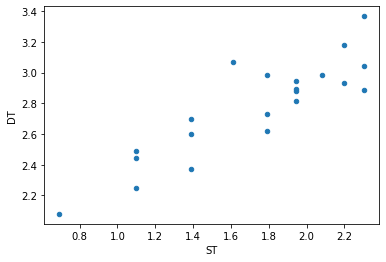

In [126]:
log3.plot.scatter(x="ST",y='DT')

<AxesSubplot:xlabel='ST', ylabel='DT'>

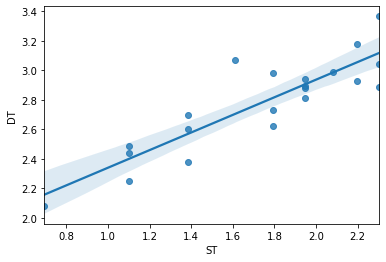

In [127]:
sns.regplot(x='ST',y='DT',data=log3)

In [139]:
sqt1=np.log(data['DT'])
sqt2=np.log(data['ST'])
sqt3=pd.DataFrame(data=(sqt1,sqt2))

In [140]:
sqt3=sqt3.transpose()
sqt3.head(5)

,DT,ST
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


<AxesSubplot:xlabel='ST', ylabel='DT'>

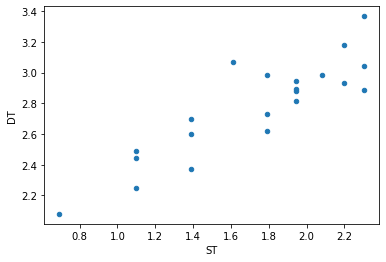

In [141]:
sqt3.plot.scatter(x='ST',y='DT')

<AxesSubplot:xlabel='ST', ylabel='DT'>

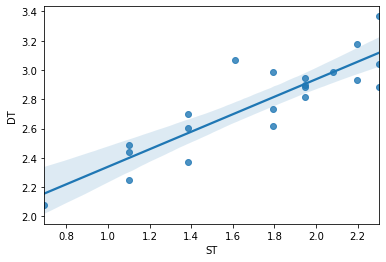

In [142]:
sns.regplot(x='ST',y='DT',data=sqt3)

In [144]:
exp1=np.log(data['DT'])
exp2=np.log(data['ST'])
exp3=pd.DataFrame(data=(exp1,exp2))

In [148]:
exp3=exp3.transpose()
exp3.head(5)

,DT,ST
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


<AxesSubplot:xlabel='ST', ylabel='DT'>

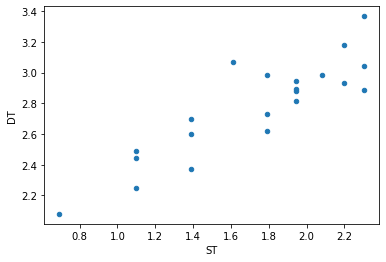

In [149]:
exp3.plot.scatter(x="ST",y='DT')

<AxesSubplot:xlabel='ST', ylabel='DT'>

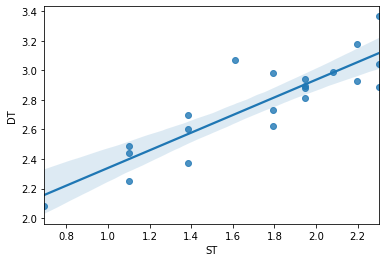

In [152]:
sns.regplot(x='ST',y="DT",data=exp3)

In [161]:
div1=1/(data['DT'])
div2=1/(data['ST'])
div3 = pd.DataFrame(data=(div1,div2))
div3=div3.transpose()

In [162]:
div3.head()

,DT,ST
0,0.047619,0.100000
1,0.074074,0.250000
2,0.050633,0.166667
3,0.041667,0.111111
4,0.034483,0.100000


<AxesSubplot:xlabel='ST', ylabel='DT'>

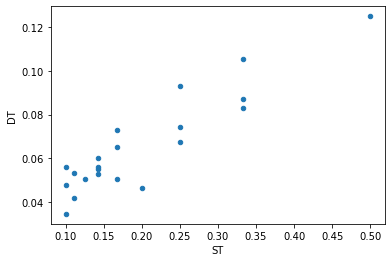

In [163]:
div3.plot.scatter(x='ST',y="DT")

<AxesSubplot:xlabel='ST', ylabel='DT'>

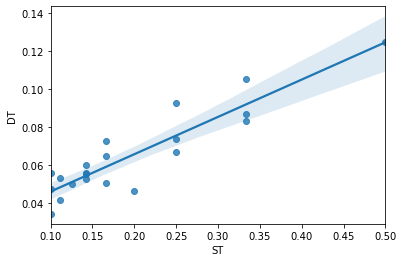

In [165]:
sns.regplot(x='ST',y='DT',data=div3)